In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
Car = pd.read_csv("car.csv")
Car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
Car.columns = ("sales", "maintenance", "doors", "persons", "boot_space", "safety", "class")

In [5]:
Car.head()

,sales,maintenance,doors,persons,boot_space,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
Car.describe()

,sales,maintenance,doors,persons,boot_space,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [7]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sales        1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   object
 3   persons      1727 non-null   object
 4   boot_space   1727 non-null   object
 5   safety       1727 non-null   object
 6   class        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [19]:
Label_Encoder = LabelEncoder()
Car["sales"] = Label_Encoder.fit_transform(Car["sales"])
Car["maintenance"] = Label_Encoder.fit_transform(Car["maintenance"])
Car["doors"] = Label_Encoder.fit_transform(Car["doors"])
Car["persons"] = Label_Encoder.fit_transform(Car["persons"])
Car["boot_space"] = Label_Encoder.fit_transform(Car["boot_space"])
Car["safety"] = Label_Encoder.fit_transform(Car["safety"])
Car["class"] = Label_Encoder.fit_transform(Car["class"])

In [20]:
Car.head()

,sales,maintenance,doors,persons,boot_space,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [21]:
X = Car[["sales", "maintenance", "doors", "persons", "boot_space", "safety"]]
Y = Car["class"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [23]:
Classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
Classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
Y_Pred = Classifier.predict(x_test)

In [34]:
print(classification_report(y_test, Y_Pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        77
           1       0.92      0.80      0.86        15
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00        15

    accuracy                           0.99       346
   macro avg       0.97      0.94      0.96       346
weighted avg       0.99      0.99      0.99       346



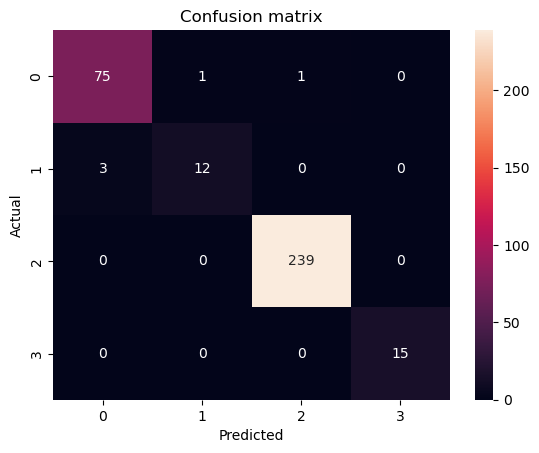

In [31]:
metrics = confusion_matrix(y_test, Y_Pred)

sns.heatmap(metrics, annot = True, fmt = "d")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()